<a href="https://colab.research.google.com/github/KennyBaptista/Gomycode/blob/main/Gomycode_Final_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, PolynomialFeatures

**Import Dataset**

In [2]:
# Importing the dataset
Students_Dataset = pd.read_csv("/content/adm_data.csv")

In [3]:
Students_Dataset

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65
...,...,...,...,...,...,...,...,...,...
395,396,324,110,3,3.5,3.5,9.04,1,0.82
396,397,325,107,3,3.0,3.5,9.11,1,0.84
397,398,330,116,4,5.0,4.5,9.45,1,0.91
398,399,312,103,3,3.5,4.0,8.78,0,0.67


**Checking for missing Values**

In [4]:
Students_Dataset.isnull().sum()

Serial No.           0
GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

**Column Checks**

In [5]:
Students_Dataset.columns

Index(['Serial No.', 'GRE Score', 'TOEFL Score', 'University Rating', 'SOP',
       'LOR ', 'CGPA', 'Research', 'Chance of Admit '],
      dtype='object')

**Checking for unique values**

In [6]:
AdmData = Students_Dataset[['Serial No.', 'GRE Score', 'TOEFL Score', 'University Rating', 'SOP',
       'LOR ', 'CGPA', 'Research', 'Chance of Admit ']].nunique

AdmData


<bound method DataFrame.nunique of      Serial No.  GRE Score  TOEFL Score  University Rating  SOP  LOR   CGPA  \
0             1        337          118                  4  4.5   4.5  9.65   
1             2        324          107                  4  4.0   4.5  8.87   
2             3        316          104                  3  3.0   3.5  8.00   
3             4        322          110                  3  3.5   2.5  8.67   
4             5        314          103                  2  2.0   3.0  8.21   
..          ...        ...          ...                ...  ...   ...   ...   
395         396        324          110                  3  3.5   3.5  9.04   
396         397        325          107                  3  3.0   3.5  9.11   
397         398        330          116                  4  5.0   4.5  9.45   
398         399        312          103                  3  3.5   4.0  8.78   
399         400        333          117                  4  5.0   4.0  9.66   

     Research  C

**Data Info**

In [7]:
Students_Dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         400 non-null    int64  
 1   GRE Score          400 non-null    int64  
 2   TOEFL Score        400 non-null    int64  
 3   University Rating  400 non-null    int64  
 4   SOP                400 non-null    float64
 5   LOR                400 non-null    float64
 6   CGPA               400 non-null    float64
 7   Research           400 non-null    int64  
 8   Chance of Admit    400 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 28.2 KB


**Description Analysis**

In [8]:
print('Descriptive analysis of data','\n')
Students_Dataset.describe()

Descriptive analysis of data 



,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,200.500000,316.807500,107.410000,3.087500,3.400000,3.452500,8.598925,0.547500,0.724350
std,115.614301,11.473646,6.069514,1.143728,1.006869,0.898478,0.596317,0.498362,0.142609
min,1.000000,290.000000,92.000000,1.000000,1.000000,1.000000,6.800000,0.000000,0.340000
25%,100.750000,308.000000,103.000000,2.000000,2.500000,3.000000,8.170000,0.000000,0.640000
50%,200.500000,317.000000,107.000000,3.000000,3.500000,3.500000,8.610000,1.000000,0.730000
75%,300.250000,325.000000,112.000000,4.000000,4.000000,4.000000,9.062500,1.000000,0.830000
max,400.000000,340.000000,120.000000,5.000000,5.000000,5.000000,9.920000,1.000000,0.970000


**Selecting valid/important data to determine the chance of admission**

In [9]:
x = Students_Dataset[['GRE Score', 'TOEFL Score', 'University Rating', 'SOP',
       'LOR ', 'CGPA']]
y = Students_Dataset['Chance of Admit ']
     

In [10]:
AdmData = Students_Dataset[['GRE Score', 'TOEFL Score', 'University Rating', 'SOP',
       'LOR ', 'CGPA', 'Chance of Admit ']]
  
AdmData

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Chance of Admit
0,337,118,4,4.5,4.5,9.65,0.92
1,324,107,4,4.0,4.5,8.87,0.76
2,316,104,3,3.0,3.5,8.00,0.72
3,322,110,3,3.5,2.5,8.67,0.80
4,314,103,2,2.0,3.0,8.21,0.65
...,...,...,...,...,...,...,...
395,324,110,3,3.5,3.5,9.04,0.82
396,325,107,3,3.0,3.5,9.11,0.84
397,330,116,4,5.0,4.5,9.45,0.91
398,312,103,3,3.5,4.0,8.78,0.67


**Importing Standard Scaler**

In [11]:
sc = StandardScaler()
trans = sc.fit_transform(AdmData)
     

In [12]:
trans_df = pd.DataFrame(trans)
trans_df
     

,0,1,2,3,4,5,6
0,1.762107,1.746971,0.798829,1.093864,1.167321,1.764818,1.373648
1,0.627656,-0.067635,0.798829,0.596653,1.167321,0.455151,0.250297
2,-0.070467,-0.562528,-0.076600,-0.397769,0.052933,-1.005631,-0.030541
3,0.453126,0.427257,-0.076600,0.099442,-1.061454,0.119339,0.531135
4,-0.244998,-0.727492,-0.952029,-1.392191,-0.504260,-0.653029,-0.522007
...,...,...,...,...,...,...,...
395,0.627656,0.427257,-0.076600,0.099442,0.052933,0.740592,0.671553
396,0.714922,-0.067635,-0.076600,-0.397769,0.052933,0.858126,0.811972
397,1.151249,1.417042,0.798829,1.591075,1.167321,1.429006,1.303439
398,-0.419528,-0.727492,-0.076600,0.099442,0.610127,0.304036,-0.381588


**Index location**

In [13]:
x= trans_df.iloc[:, :-1]
y = trans_df.iloc[:, -1]

y

0      1.373648
1      0.250297
2     -0.030541
3      0.531135
4     -0.522007
         ...   
395    0.671553
396    0.811972
397    1.303439
398   -0.381588
399    1.584276
Name: 6, Length: 400, dtype: float64

**Test and Train**

In [14]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size= .2)

In [15]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn import metrics

# Building Model

In [16]:
linear_model = LinearRegression()
linear_model.fit(x_train, y_train)

target = linear_model.predict(x_test)

In [17]:
target

array([ 1.11216435,  0.88083368, -0.59336574,  0.75609409,  0.39575427,
       -0.80487993,  0.55364109, -0.09232293,  0.07067516, -0.12643381,
        0.0617282 ,  1.69250831,  0.30540232, -0.04830161, -1.41532089,
       -0.36768882,  0.11333403,  1.97605219,  0.40825423, -0.01847847,
        1.45973881, -0.06251536,  0.76844347, -1.10499448, -0.12950348,
       -1.80494548, -0.87916874, -1.33371022,  1.70080961, -0.85223429,
        0.81574327,  0.05568711, -0.85621525,  0.27854911,  0.652931  ,
        0.38931473, -0.49596191,  0.47616966,  0.75620137, -0.2379362 ,
       -0.20335352, -1.63710466,  0.053561  ,  0.05697412, -1.50986606,
        1.04778006, -1.34108849, -1.08385613, -0.54469622, -0.38953286,
        1.30071526, -0.1967181 , -1.78480443,  0.32697973,  0.91148495,
        0.71381253, -1.49377834, -0.39356931, -0.62559898,  0.27753321,
        1.01572938, -0.984401  , -0.28535023,  0.37918958, -0.18245941,
        0.52486437,  0.05253517, -0.5841035 ,  0.46582147, -0.03

**Accuracy Test**

In [18]:
print(mean_squared_error(y_test, target))
print(metrics.r2_score(y_test, target))

0.19980536326080173
0.7427291228824737


# Simple Linear Regression Model

In [19]:
x_Sop = trans_df.iloc[:,3]
y_Sop = trans_df.iloc[:,-1]
     

In [20]:
x_train, x_test, y_train, y_test = train_test_split(x_Sop, y_Sop, test_size= .2)

In [21]:
x_train = np.array(x_train).reshape(-1,1)
x_test = np.array(x_test).reshape(-1,1)

In [22]:
linemodel = LinearRegression()
linemodel.fit(x_train, y_train)

target = linemodel.predict(x_test)
     

In [23]:
target
     

array([ 0.0949839 , -0.5561376 , -1.53281985,  0.74610539,  0.42054464,
       -0.88169835,  0.74610539, -0.5561376 , -1.53281985, -0.5561376 ,
        0.0949839 ,  0.0949839 ,  0.42054464,  1.07166614,  0.74610539,
       -0.5561376 ,  0.0949839 ,  0.42054464, -0.5561376 ,  0.0949839 ,
       -0.5561376 ,  0.42054464,  0.42054464, -1.2072591 , -1.2072591 ,
       -1.2072591 ,  0.42054464, -0.23057685, -1.2072591 ,  0.0949839 ,
        1.07166614,  1.07166614,  0.0949839 , -0.5561376 , -1.2072591 ,
       -1.2072591 , -1.2072591 ,  0.74610539, -1.2072591 ,  0.0949839 ,
        0.42054464, -0.88169835,  1.07166614,  0.0949839 , -0.23057685,
        1.07166614,  0.0949839 ,  1.07166614, -0.88169835, -0.23057685,
       -0.23057685,  0.42054464, -1.2072591 ,  0.74610539, -0.23057685,
        0.0949839 , -0.23057685,  0.0949839 , -0.23057685, -1.2072591 ,
       -0.23057685,  1.07166614, -0.23057685,  0.42054464,  0.74610539,
       -0.23057685, -1.2072591 ,  0.74610539, -0.88169835,  0.74

**Accuracy Check**

In [24]:
print(mean_squared_error(y_test, target))
print(metrics.r2_score(y_test, target))

0.46406714230172613
0.5769123857938794


In [25]:
trans

array([[ 1.76210664,  1.74697064,  0.79882862, ...,  1.16732114,
         1.76481828,  1.37364801],
       [ 0.62765641, -0.06763531,  0.79882862, ...,  1.16732114,
         0.45515126,  0.25029671],
       [-0.07046681, -0.56252785, -0.07660001, ...,  0.05293342,
        -1.00563118, -0.03054111],
       ...,
       [ 1.15124883,  1.41704229,  0.79882862, ...,  1.16732114,
         1.42900622,  1.30343855],
       [-0.41952842, -0.72749202, -0.07660001, ...,  0.61012728,
         0.30403584, -0.38158839],
       [ 1.41304503,  1.58200646,  0.79882862, ...,  0.61012728,
         1.78160888,  1.58427637]])

In [26]:

x

,0,1,2,3,4,5
0,1.762107,1.746971,0.798829,1.093864,1.167321,1.764818
1,0.627656,-0.067635,0.798829,0.596653,1.167321,0.455151
2,-0.070467,-0.562528,-0.076600,-0.397769,0.052933,-1.005631
3,0.453126,0.427257,-0.076600,0.099442,-1.061454,0.119339
4,-0.244998,-0.727492,-0.952029,-1.392191,-0.504260,-0.653029
...,...,...,...,...,...,...
395,0.627656,0.427257,-0.076600,0.099442,0.052933,0.740592
396,0.714922,-0.067635,-0.076600,-0.397769,0.052933,0.858126
397,1.151249,1.417042,0.798829,1.591075,1.167321,1.429006
398,-0.419528,-0.727492,-0.076600,0.099442,0.610127,0.304036


In [27]:
y

0      1.373648
1      0.250297
2     -0.030541
3      0.531135
4     -0.522007
         ...   
395    0.671553
396    0.811972
397    1.303439
398   -0.381588
399    1.584276
Name: 6, Length: 400, dtype: float64

# Polynomial Regression

In [28]:
x_Sop = trans_df.iloc[:,3]
y_Sop = trans_df.iloc[:,-1]

In [29]:
x_train, x_test, y_train, y_test = train_test_split(x_Sop, y_Sop, test_size= .2)

In [30]:
x_train = np.array(x_train).reshape(-1,1)
x_test = np.array(x_test).reshape(-1,1)
y_train = np.array(y_train).reshape(-1,1)
y_test = np.array(y_test).reshape(-1,1)

In [31]:
linemodel = LinearRegression()
linemodel.fit(x_train, y_train)

target = linemodel.predict(x_test)

In [32]:
target

array([[ 0.45998839],
       [-0.89470364],
       [ 1.13733441],
       [-0.55603063],
       [ 0.12131538],
       [ 0.45998839],
       [ 0.45998839],
       [ 0.7986614 ],
       [-1.23337665],
       [ 0.12131538],
       [ 0.12131538],
       [-1.23337665],
       [-0.21735762],
       [ 0.12131538],
       [-0.21735762],
       [-0.55603063],
       [-1.23337665],
       [ 0.12131538],
       [ 0.12131538],
       [-0.55603063],
       [-0.21735762],
       [ 0.7986614 ],
       [-0.21735762],
       [-0.21735762],
       [ 0.7986614 ],
       [ 0.45998839],
       [-0.55603063],
       [-0.21735762],
       [-0.55603063],
       [ 0.45998839],
       [ 0.45998839],
       [-0.55603063],
       [ 1.13733441],
       [ 0.45998839],
       [ 1.13733441],
       [ 0.45998839],
       [ 0.45998839],
       [ 1.13733441],
       [-0.21735762],
       [-0.21735762],
       [-0.55603063],
       [ 0.12131538],
       [-0.89470364],
       [ 0.45998839],
       [-0.55603063],
       [ 0

In [33]:
print(mean_squared_error(y_test, target))
print(metrics.r2_score(y_test, target))

0.7521354985182418
0.270341435038546


In [34]:
from sklearn.linear_model import LinearRegression
lin_rag = LinearRegression()

In [35]:

lin_rag.fit(x_train, y_train)

LinearRegression()

In [36]:
print('intercept costant for our linear model: ', lin_rag.intercept_)
print('coefficient of x for linear model: ', lin_rag.coef_)

intercept costant for our linear model:  [0.05358078]
coefficient of x for linear model:  [[0.68114543]]


In [37]:
y_pred = lin_rag.predict(x_test)

In [38]:
import matplotlib.pyplot as plt

In [39]:
len(x_test) == len(y_pred)

True

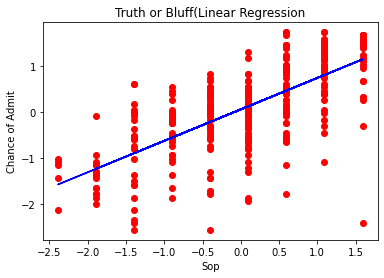

In [40]:
plt.scatter(x_train, y_train,color = 'red')
plt.plot(x_test, y_pred, color = 'blue')
plt.title('Truth or Bluff(Linear Regression')
plt.xlabel('Sop')
plt.ylabel('Chance of Admit')
plt.show()

In [41]:
from sklearn.preprocessing import PolynomialFeatures
poly_rag = PolynomialFeatures(degree = 4)

In [42]:

x_poly = poly_rag.fit_transform(x_test)
lin_rag_2 = LinearRegression()
lin_rag_2.fit(x_poly, y_test)

LinearRegression()

In [43]:
y_poly_pred =lin_rag_2.predict(x_poly)
y_poly_pred

array([[-1.39181957e-03],
       [-1.18411359e+00],
       [ 1.23541201e+00],
       [-7.61289719e-01],
       [-1.66827040e-01],
       [-1.39181957e-03],
       [-1.39181957e-03],
       [ 3.35384618e-01],
       [-1.42318908e+00],
       [-1.66827040e-01],
       [-1.66827040e-01],
       [-1.42318908e+00],
       [-3.94826169e-01],
       [-1.66827040e-01],
       [-3.94826169e-01],
       [-7.61289719e-01],
       [-1.42318908e+00],
       [-1.66827040e-01],
       [-1.66827040e-01],
       [-7.61289719e-01],
       [-3.94826169e-01],
       [ 3.35384618e-01],
       [-3.94826169e-01],
       [-3.94826169e-01],
       [ 3.35384618e-01],
       [-1.39181957e-03],
       [-7.61289719e-01],
       [-3.94826169e-01],
       [-7.61289719e-01],
       [-1.39181957e-03],
       [-1.39181957e-03],
       [-7.61289719e-01],
       [ 1.23541201e+00],
       [-1.39181957e-03],
       [ 1.23541201e+00],
       [-1.39181957e-03],
       [-1.39181957e-03],
       [ 1.23541201e+00],
       [-3.9

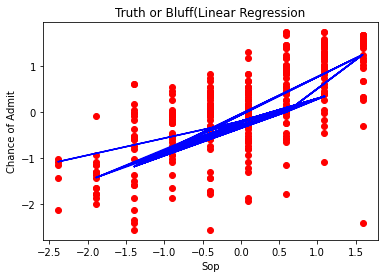

In [44]:
plt.scatter(x_train,y_train, color = 'red')
plt.plot(x_test, y_poly_pred, color = 'blue')
plt.title('Truth or Bluff(Linear Regression')
plt.xlabel('Sop')
plt.ylabel('Chance of Admit')
plt.show()

# CORRELATION

In [45]:
Students_Dataset.corr()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
Serial No.,1.000000,-0.097526,-0.147932,-0.169948,-0.166932,-0.088221,-0.045608,-0.063138,0.042336
GRE Score,-0.097526,1.000000,0.835977,0.668976,0.612831,0.557555,0.833060,0.580391,0.802610
TOEFL Score,-0.147932,0.835977,1.000000,0.695590,0.657981,0.567721,0.828417,0.489858,0.791594
University Rating,-0.169948,0.668976,0.695590,1.000000,0.734523,0.660123,0.746479,0.447783,0.711250
SOP,-0.166932,0.612831,0.657981,0.734523,1.000000,0.729593,0.718144,0.444029,0.675732
LOR,-0.088221,0.557555,0.567721,0.660123,0.729593,1.000000,0.670211,0.396859,0.669889
CGPA,-0.045608,0.833060,0.828417,0.746479,0.718144,0.670211,1.000000,0.521654,0.873289
Research,-0.063138,0.580391,0.489858,0.447783,0.444029,0.396859,0.521654,1.000000,0.553202
Chance of Admit,0.042336,0.802610,0.791594,0.711250,0.675732,0.669889,0.873289,0.553202,1.000000


# heatmap

In [48]:
def plot_correlation_map( df ):

    corr = df.corr()
    s , ax = plt.subplots( figsize =( 12 , 10 ) )
    cmap = sns.diverging_palette( 220 , 10 , as_cmap = True )
    s = sns.heatmap(
        corr, 
        cmap = cmap,
        square=True, 
        cbar_kws={ 'shrink' : .9 }, 
        ax=ax, 
        annot = True, 
        annot_kws = { 'fontsize' : 12 }
        )

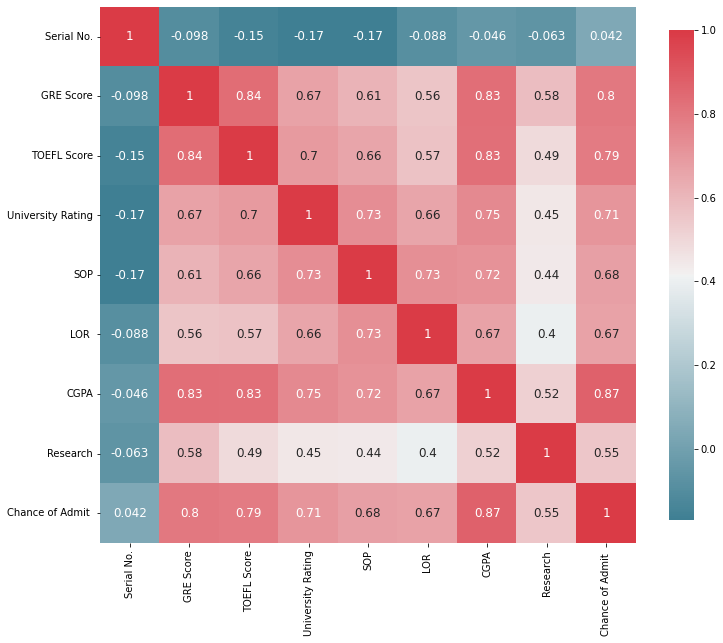

In [49]:
plot_correlation_map(Students_Dataset)

In [58]:
# finding correlation between 'Chance of Admit' and all other columns
Chance_of_Admission = Students_Dataset.corr()['Chance of Admit ']
Chance_of_Admission

Serial No.           0.042336
GRE Score            0.802610
TOEFL Score          0.791594
University Rating    0.711250
SOP                  0.675732
LOR                  0.669889
CGPA                 0.873289
Research             0.553202
Chance of Admit      1.000000
Name: Chance of Admit , dtype: float64

In [63]:
Chance_of_Admission= pd.DataFrame(Chance_of_Admission)
Chance_of_Admission

,Chance of Admit
GRE Score,0.802610
TOEFL Score,0.791594
University Rating,0.711250
SOP,0.675732
LOR,0.669889
CGPA,0.873289
Research,0.553202


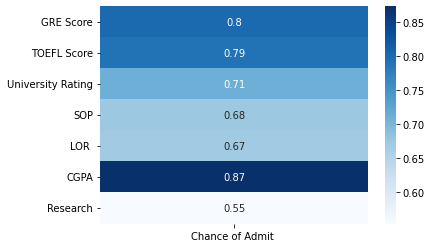

In [66]:
# Plotting heatmap for 'Chance of Admit ' vs all other columns
sns.heatmap(Chance_of_Admission, annot = True, cmap = 'Blues')

I realised that SOP (Statement of purpose) is of significance in the Admission of students on the Student' Dataset. "SOP" is of Positive correlation with "Chance of Admission", having "0.68". Also, considering the color scheme, SOP stands a higher chance than Research.